In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
import healpy as hp

In [5]:
# download raw data

planck30 = hp.read_map('../data_files/LFI_SkyMap_030_1024_R2.01_full.fits')
planck44 = hp.read_map('../data_files/LFI_SkyMap_044_1024_R2.01_full.fits')
planck70 = hp.read_map('../data_files/LFI_SkyMap_070_1024_R2.01_full.fits')
planck100 = hp.read_map('../data_files/HFI_SkyMap_100_2048_R2.02_full.fits')
planck143 = hp.read_map('../data_files/HFI_SkyMap_143_2048_R2.02_full.fits')
planck217 = hp.read_map('../data_files/HFI_SkyMap_217_2048_R2.02_full.fits')
planck353 = hp.read_map('../data_files/HFI_SkyMap_353_2048_R2.02_full.fits')

/home/samuel/anaconda3/envs/datasci/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/samuel/anaconda3/envs/datasci/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/samuel/anaconda3/envs/datasci/lib/python3.8/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [6]:
# lower the resolution of the maps

planck30 = hp.ud_grade(planck30, 512)
planck44 = hp.ud_grade(planck44, 512)
planck70 = hp.ud_grade(planck70, 512)
planck100 = hp.ud_grade(planck100, 512)
planck143 = hp.ud_grade(planck143, 512)
planck217 = hp.ud_grade(planck217, 512)
planck353 = hp.ud_grade(planck353, 512)

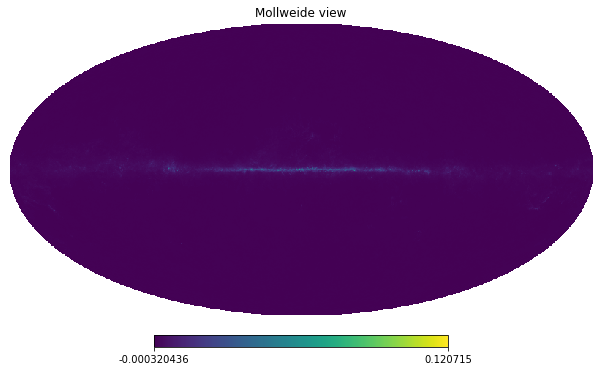

In [7]:
# example plot of raw data

hp.mollview(planck217, nest=False)

In [8]:
# implement the Lagrange method

map_array = np.array([planck30, planck44, planck70, planck100, planck143, planck217, planck353])

# define weighted map sum function

def map_sum(w):
    """Given an array of weights w,returns a weighted sum of the maps"""
    return w@map_array

In [36]:
def get_H():
    i = 0
    j = 0
    H = np.zeros((len(map_array), len(map_array)))
    for m in map_array:
        j = 0
        for n in map_array:
            product = m*n
            product_sum = np.sum(product)
            H[i, j] = product_sum
            j+=1
        i+=1
    return H

In [37]:
H = get_H()

In [40]:
e = np.ones(len(map_array))

In [42]:
w = (np.linalg.inv(H)@e) / (e.T@H@e)

In [45]:
opt_map = map_sum(w)

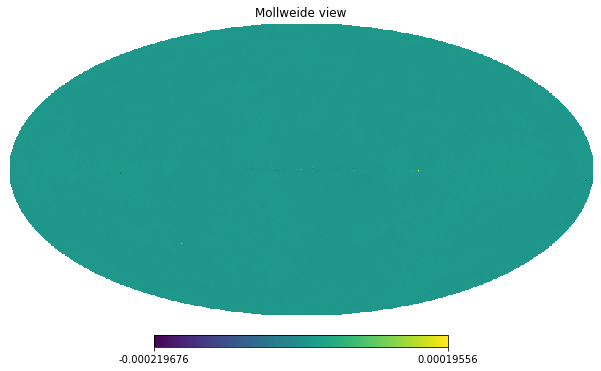

In [46]:
hp.mollview(opt_map, nest=False)